In [ ]:
! kaggle datasets download fedesoriano/heart-failure-prediction

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 15.8MB/s]


In [ ]:
! pip install opencv-python

In [ ]:
df=pd.read_csv('/content/heart.csv')

**Problem Statement :**
Aaj kal medical data kaafi zyada available hai aur Data Science ki madad se startups is challenge ko handle kar rahe hain, jisme unka aim yeh hai ke un diseases ke indicators banaye jo aane wale waqt mein ho sakti hain! Cardiovascular diseases (CVDs) duniya mein death ka sabse bada cause hain, har saal 17.9 million log inhi diseases ki wajah se mar jate hain, jo ke total deaths ka 31% hai. Heart failure bhi CVDs ke karan hota hai. Jo log cardiovascular diseases se suffer kar rahe hain ya phir jin mein high risk factors hain (jaise hypertension, diabetes, hyperlipidaemia ya already established disease), unko early detection aur management ki zarurat hoti hai, jisme ek machine learning model kaafi madadgar ho sakta hai. Is tarah se, hum ek aur problem ko automate karne ki koshish kar rahe hain jo nature mein hoti hai, taake hum ise counter kar sakein aur agli problems pe focus kar sakein AI techniques ki madad se.

**Aim:**

Humara aim yeh hai ke hum predict kar sakein ke kya koi patient heart failure ke liye prone hai ya nahi, jo ke kai attributes par depend karta hai. Yeh ek binary classification problem hai jisme numerical aur categorical features dono shaamil hain.

# Dataset Attributes:
**Age:** Patient ki umar [saal mein]

**Sex:** Patient ka gender [M: Male, F: Female]

**ChestPainType:**Chest pain ka type

**TA:** Typical Angina

**ATA:** Atypical Angina

**NAP:** Non-Anginal Pain

**ASY:** Asymptomatic

**RestingBP:** Resting blood pressure [mm Hg]

**Cholesterol:** Serum cholesterol level [mm/dl]

**FastingBS:** Fasting blood sugar
  
  **1:** Agar FastingBS > 120 mg/dl
  
  **0:** Agar FastingBS ≤ 120 mg/dl
  
**RestingECG:** Resting electrocardiogram ke results

**Normal:** Normal

**ST: **ST-T wave abnormality (T wave inversions aur ST elevation/depression > 0.05 mV)

**LVH:** Left ventricular hypertrophy (Estes' criteria ke mutabiq)

**MaxHR:** Maximum heart rate achieved [60 se 202 ke darmiyan numeric value]

**ExerciseAngina:** Exercise-induced angina

  **Y: **Yes

  **N:** No

**Oldpeak:** ST depression [Numeric value]

**ST_Slope:** Peak exercise ST segment ka slope

**Up:** Upsloping

**Flat:** Flat

**Down:** Downsloping

**HeartDisease:** Target class (output)
  
  **1:** Heart disease present
  
  **0:**Normal

Yeh attributes patient ke health aur condition ke mutabiq hai, jo classification model ke liye kaafi important features provide karte hain.

# Notebook Ka Content:
**Dataset Information:**

Dataset ka overview aur uske attributes ke bare mein detail.
Features aur target variable ka introduction aur data types ki jaankari.

**Exploratory Data Analysis (EDA):**

Data ki visualizations banake feature distributions samajhna.
Missing values aur outliers ko identify karna.
Features aur target variable ke darmiyan relationships analyze karna.

**Summary of EDA:**

EDA ke main observations aur insights ko note karna.
Data ke andar jo patterns samajh aaye, unka zikr.

**Modeling:**

Classification ke liye machine learning models banana.
Models ko train aur evaluate karna using performance metrics.

**Conclusion:**

Model ki performance aur main takeaways ka summary.
Future improvements aur kaam ke suggestions dena.

# Aap Kya Seekhenge:
**Data Visualization:**

Data ka analysis karne aur trends samajhne ke liye visualizations banana.

**Data Scaling:**

Numerical data ko normalize/standardize karne ki techniques seekhna, taake models better perform karein.

**Statistical Tests for Feature Engineering:**

Features ko select aur transform karne ke liye statistical methods ka use.

**Modeling aur Results Visualization:**

Machine learning models implement karna aur unke results ko samajhna aur dikhana.

# Related Work:

**Binary Classification:**

Yeh ek discussion post hai jo Binary Classification problems ko solve karne ka approach samjhata hai.

Ismein notebooks hain jo datasets par kaam dikhate hain, simple aur asaan code
explanation ke saath.

**Time Series Analysis:**

Yeh post Time Series Analysis ke basics ko explain karti hai.
Notebooks ke zariye datasets par kaam kiya gaya hai, aur asaan aur samajhne layak explanation di gayi hai.

**Unsupervised Learning:**

Yeh notebook Unsupervised Learning problem ko explain karti hai K-Means clustering algorithm ka use karke.

# ***Dataset Information***





# Import the Necessary Libraries :¶

In [ ]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [ ]:
! kaggle datasets download fedesoriano/heart-failure-prediction

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
heart-failure-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
zip=zipfile.ZipFile('/content/heart-failure-prediction.zip')
zip.extractall()
zip.close()

In [ ]:
data=pd.read_csv('/content/heart.csv')

In [ ]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N     0.00       Up             0  
1              N     1.00     Flat             1  
2              N     0.00       Up             0  
3              Y     1.50     Flat             1  
4              N     0.00       Up             0

# **Data Info**

In [ ]:
data.shape

(918, 12)

In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<Axes: >

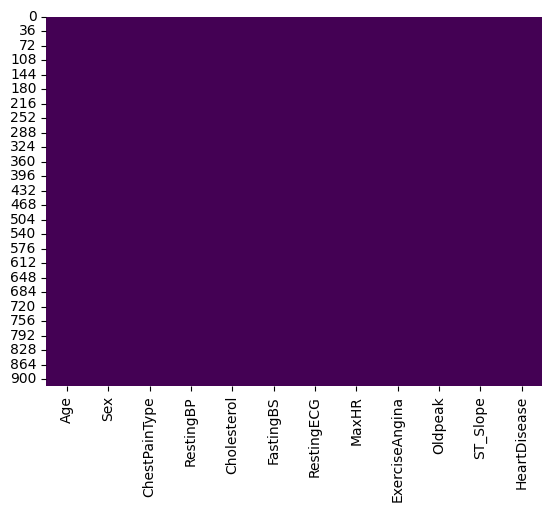

In [ ]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

**Data mein koi null values nahi hain. 🚀**

In [ ]:
data.describe()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
count 918.00     918.00       918.00     918.00 918.00   918.00        918.00
mean   53.51     132.40       198.80       0.23 136.81     0.89          0.55
std     9.43      18.51       109.38       0.42  25.46     1.07          0.50
min    28.00       0.00         0.00       0.00  60.00    -2.60          0.00
25%    47.00     120.00       173.25       0.00 120.00     0.00          0.00
50%    54.00     130.00       223.00       0.00 138.00     0.60          1.00
75%    60.00     140.00       267.00       0.00 156.00     1.50          1.00
max    77.00     200.00       603.00       1.00 202.00     6.20          1.00

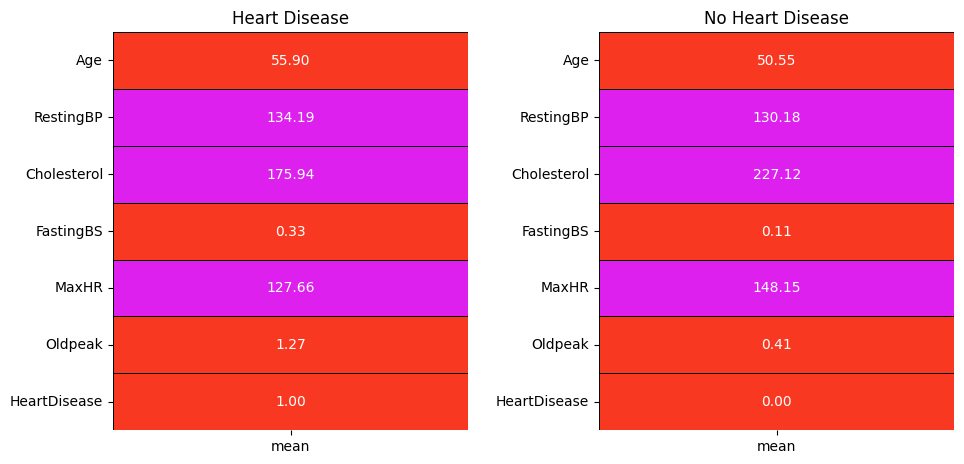

In [ ]:
yes=data[data['HeartDisease']==1].describe().T
no=data[data['HeartDisease']==0].describe().T
color=['#F93822','#DD20EE']

fig,axes=plt.subplots(nrows=1 ,ncols=2 , figsize =(10,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot=True,cmap=color,linewidths=0.4,linecolor='black',cbar=False,fmt=".2f",)
plt.title('Heart Disease')

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot=True,cmap=color,linewidths=0.4,linecolor='black',cbar=False,fmt=".2f",)
plt.title('No Heart Disease')

fig.tight_layout(pad=2)

In [ ]:
yes

count   mean    std   min    25%    50%    75%    max
Age          508.00  55.90   8.73 31.00  51.00  57.00  62.00  77.00
RestingBP    508.00 134.19  19.83  0.00 120.00 132.00 145.00 200.00
Cholesterol  508.00 175.94 126.39  0.00   0.00 217.00 267.00 603.00
FastingBS    508.00   0.33   0.47  0.00   0.00   0.00   1.00   1.00
MaxHR        508.00 127.66  23.39 60.00 112.00 126.00 144.25 195.00
Oldpeak      508.00   1.27   1.15 -2.60   0.00   1.20   2.00   6.20
HeartDisease 508.00   1.00   0.00  1.00   1.00   1.00   1.00   1.00

In [ ]:
no

count   mean   std   min    25%    50%    75%    max
Age          410.00  50.55  9.44 28.00  43.00  51.00  57.00  76.00
RestingBP    410.00 130.18 16.50 80.00 120.00 130.00 140.00 190.00
Cholesterol  410.00 227.12 74.63  0.00 197.25 227.00 266.75 564.00
FastingBS    410.00   0.11  0.31  0.00   0.00   0.00   0.00   1.00
MaxHR        410.00 148.15 23.29 69.00 134.00 150.00 165.00 202.00
Oldpeak      410.00   0.41  0.70 -1.10   0.00   0.00   0.60   4.20
HeartDisease 410.00   0.00  0.00  0.00   0.00   0.00   0.00   0.00


Heart disease aur non-heart disease cases ke liye sabhi features ke mean values calculate karne ke liye hum dataset ko target variable HeartDisease ke basis par group karenge. Isme:

  
  **Heart Disease (1):**Patients jo heart disease se affected hain.
  
  **Non-Heart Disease (0):** Patients jo heart disease se unaffected hain.
Iska result feature-wise comparison provide karega. Aap yeh steps follow kar sakte hain:

# **Exploratory Data Analysis**


# **Features ko Numerical aur Categorical mein divide karna:**
Yeh kaafi zaroori hai taake hum data ko achi tarah samajh sakein aur uspar sahi analysis aur preprocessing kar sakein. Numerical features wo hote hain jo numbers mein measure kiye jaate hain, aur Categorical features wo hote hain jo categories ya labels mein hotay hain.

In [ ]:
col=list(data.columns)
categorical_features=[]
numerical_feartures=[]
for i in col:
  if len(data[i].unique())> 6:
    numerical_feartures.append(i)
  else:
    categorical_features.append(i)


print(categorical_features)
print(numerical_feartures)

['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


# **Features ko Numerical aur Categorical mein divide karte waqt ka approach:**

Yahan pe categorical features ko define kiya gaya hai agar attribute mein 6 se kam unique elements hon, to wo categorical feature hoga, aur agar unique elements zyada hain, to wo numerical feature hoga.

Ek typical approach yeh bhi hai ke feature ki datatype ke basis par division kiya jaaye:

Agar datatype integer hai, to attribute ko numerical feature samjha jaata hai.
Agar datatype string hai, to attribute ko categorical feature samjha jaata hai.
Is dataset mein features kam hain, isliye hum manually bhi dataset ko check kar sakte hain aur dekh sakte hain kis feature kaunsi category mein aata hai.

# **Categorical Features :¶**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1=data.copy(deep=True)

df1['Sex']=le.fit_transform(df1['Sex'])
df1['ChestPainType']=le.fit_transform(df1['ChestPainType'])
df1['RestingECG']=le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina']=le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope']=le.fit_transform(df1['ST_Slope'])

# **Original dataset ka deep copy banakar categorical features ko label encode karna:**
Jab hum deep copy banate hain, to original dataset mein jo bhi changes karte hain, wo deep copy mein reflect nahi hotay. Isliye hum deep copy ka use karte hain jismein saare categorical features ko **label encoding** karke **numerical values** mein convert kiya gaya hota hai. Is tarah se hum is deep copy ko visualization aur modeling ke liye use karte hain, jismein sab features numerical values mein hote hain.

# **Distribution of Categorical Features :**

ValueError: num must be an integer with 1 <= num <= 6, not 7

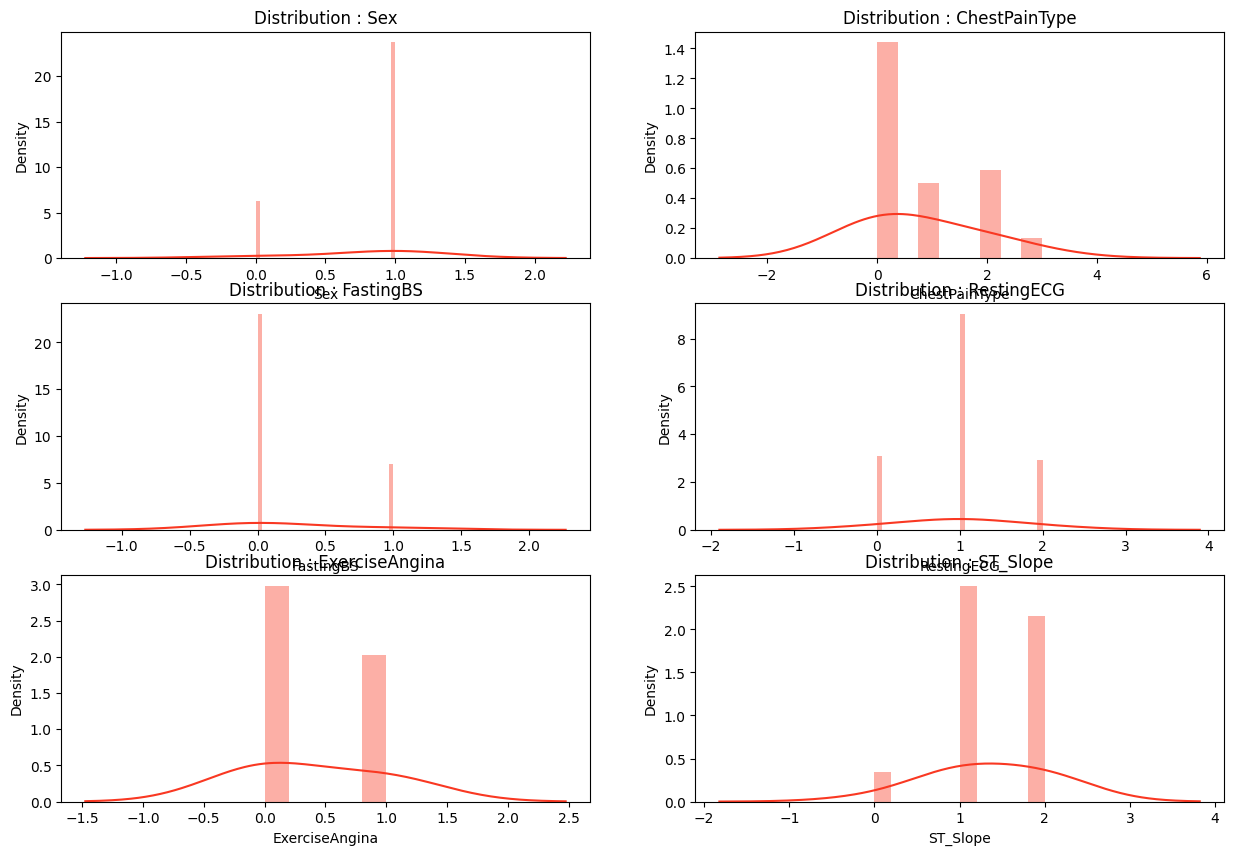

In [ ]:
fif,ax =plt.subplots(nrows=3,ncols=2,figsize=(15,10))
for i in range(len(categorical_features)):

  plt.subplot(3,2,i+1)
  sns.distplot(df1[categorical_features[i]],kde_kws={'bw':1}, color =color[0]);
  title='Distribution : '+ categorical_features[i]
  plt.title(title)

plt.figure(figsize=(4.75,4.55))
sns.distplot(df1[categorical_features[len(categorical_features)-1]],kde_kws={'bw':1},color=color[0])
title='Distribution : '+ categorical_features[len(categorical_features)-1]
plt.title(title)

# Sabhi categorical features near about Normally Distributed hain:
Yeh kaafi interesting observation hai. Agar categorical features ko numerical values mein convert kar liya gaya ho, to hum unke distributions ko analyze kar sakte hain. Normal distribution ka matlab hai ke data kaafi symmetric hota hai, aur mean, median, aur mode close hote hain. Iska matlab hai ke humare categorical features ka behavior predict karna thoda asaan ho sakta hai, aur model bhi efficiently train ho sakta hai.

# Numerical Features :¶

# Distribution of Numerical Features :

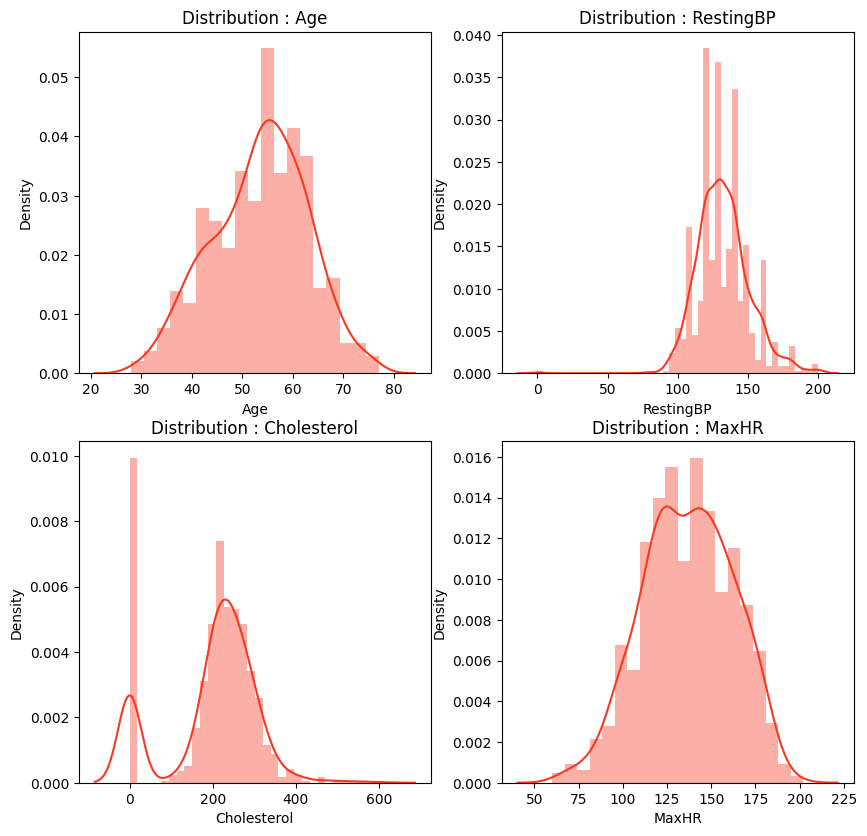

Text(0.5, 1.0, 'Distribution : Oldpeak')

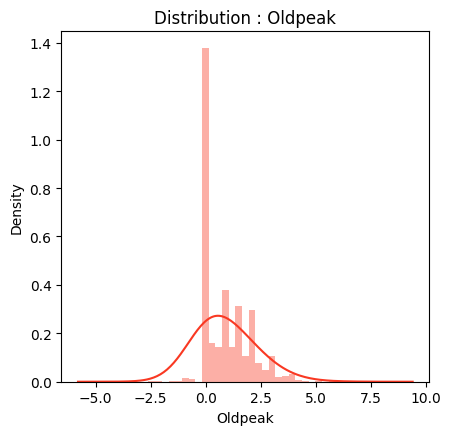

In [ ]:
fig ,ax=plt.subplots(nrows=2,ncols=2,figsize=(10,9.75))
for i in range(len(numerical_feartures)-1):
  plt.subplot(2,2,i+1)
  sns.distplot(data[numerical_feartures[i]],color=color[0])
  title='Distribution : '+ numerical_feartures[i]
  plt.title(title)
plt.show()

plt.figure(figsize=(4.75,4.55))
sns.distplot(df1[numerical_feartures[len(numerical_feartures)-1]],color=color[0],kde_kws={'bw':1})
title='Distribution : '+ numerical_feartures[len(numerical_feartures)-1]
plt.title(title)


# **Oldpeak ka data distribution rightly skewed hai:**
Yeh iska matlab hai ke Oldpeak feature ka distribution right side par skewed hai, yani zyada values low range mein hain aur few extreme high values hain. Is type ka distribution modeling ke liye specific techniques ki zaroorat pad sakti hai, jaise ki data transformation (log transformation) ya skewness ko handle karne ke liye.

# **Cholesterol ka data distribution bimodal hai:**
Iska matlab hai ke Cholesterol feature ka distribution do distinct peaks (modes) dikha raha hai, yani do alag-alag groups ya ranges hain jinmein values concentrated hain. Yeh bhi ek important observation hai, kyunki bimodal distribution ka matlab ho sakta hai ki dataset mein do alag-alag subgroups hain jo alag behavior show karte hain.

# **Target Variable Visualization (HeartDisease) :¶**

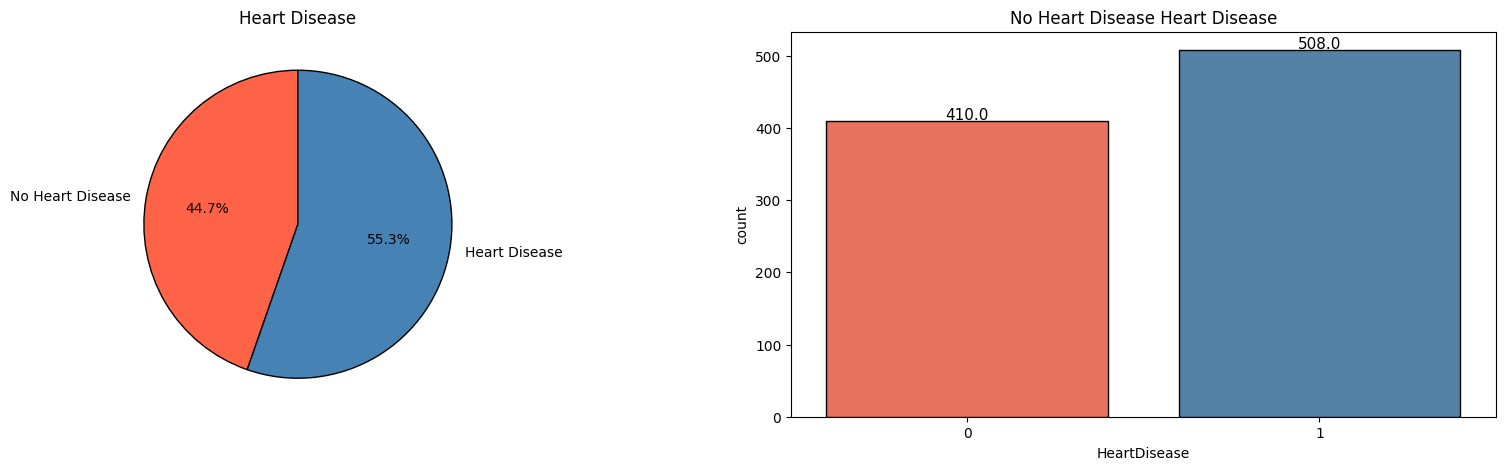

In [ ]:
l=list(data['HeartDisease'].value_counts())
circle=[l[1]/sum(l)*100,l[0]/sum(l)*100]

pie_colors = ['#FF6347', '#4682B4']
bar_colors = ['#FF6347', '#4682B4']

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels=['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle=90,colors=pie_colors,wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('Heart Disease')

plt.subplot(1,2,2)
ax=sns.countplot(x='HeartDisease',data =data,palette=bar_colors, edgecolor='black')
for rect in ax.patches:
  ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+2,rect.get_height(),horizontalalignment='center',fontsize=11)
plt.title('No Heart Disease Heart Disease')
plt.show()

# The dataset is pretty much evenly balanced!

# Categorical Features vs Target Variable (HeartDisease) :¶

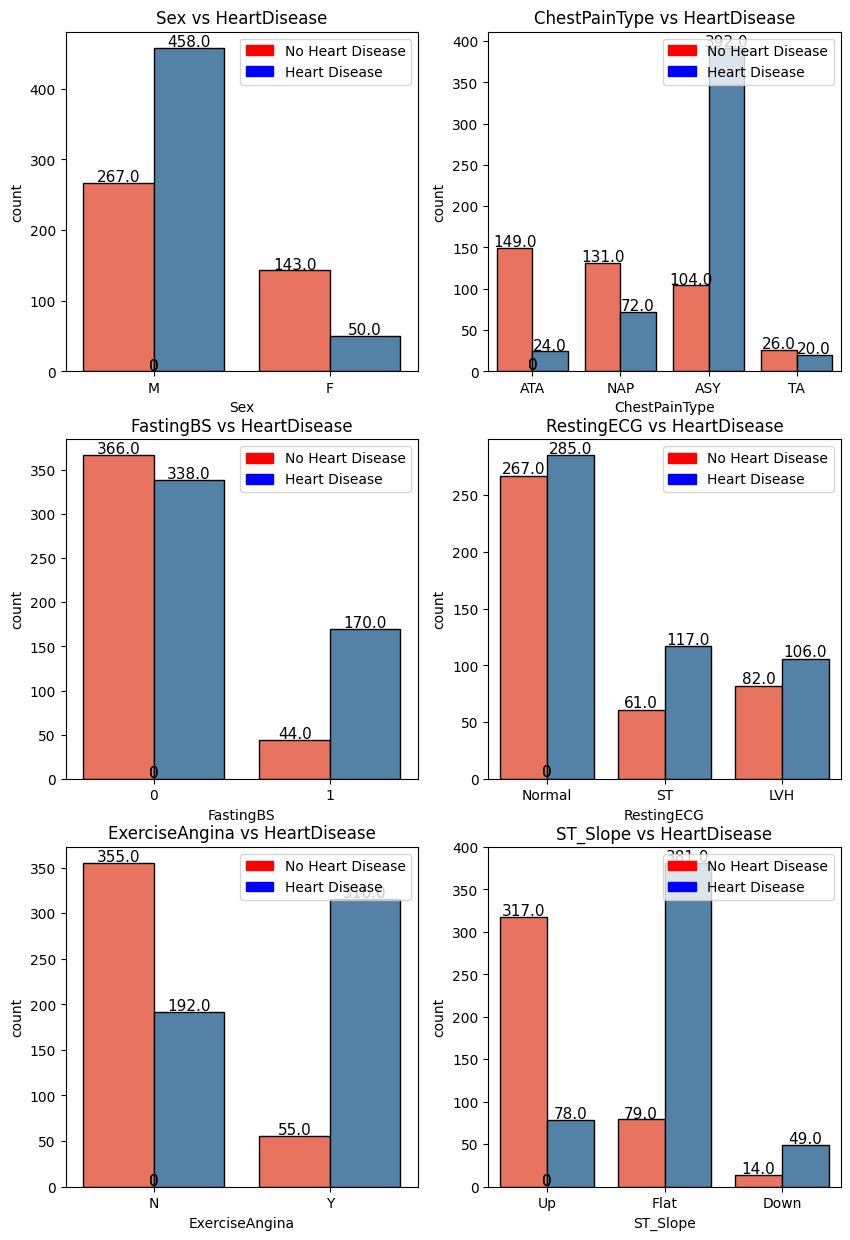

In [ ]:
import matplotlib.patches as mpatches


fig ,ax =plt.subplots(nrows=3 ,ncols=2 ,figsize=(10,15))
for i in range(len(categorical_features)-1):
  plt.subplot(3,2,i+1)
  ax=sns.countplot(x=categorical_features[i],hue='HeartDisease',data=data,palette=bar_colors,edgecolor='black')

  for rect in ax.patches:
    ax.text(rect.get_x()+rect.get_width()/2,rect.get_height()+2,rect.get_height(),horizontalalignment='center',fontsize=11)
  title=categorical_features[i]+' vs HeartDisease'
  legend_patches = [
      mpatches.Patch(color='red', label='No Heart Disease'),
      mpatches.Patch(color='blue', label='Heart Disease')
    ]

  plt.legend(handles=legend_patches, loc='upper right')
  plt.title(title)
plt.show()


# Male population mein heart disease zyada hai:
Male population mein **heart disease** ke patients ki tadaad **no heart disease** patients se zyada hai.
**Female population** mein **ulta scenario** hai, yahan heart disease patients kam hain aur no heart disease patients zyada hain.

# ASY type chest pain ka strong signal hai heart disease ke liye:
**ASY (Asymptomatic)** chest pain ka hona ek bada indicator hai ki patient ke heart disease ke chances zyada hain.

# Fasting Blood Sugar tricky hai:
Patients jinka **Fasting Blood Sugar** diagnosed hai aur jo diagnosed nahi hain, dono groups mein heart disease patients significant hain. Iska matlab hai ke yeh feature alone ek strong predictor nahi hai, lekin overall impact karta hai.

# RestingECG clear nahi hai:
**RestingECG** mein koi ek category heart disease patients ko highlight nahi karti. Yeh sabhi 3 values (Normal, ST, LVH) mein heart disease patients ki tadaad high hai.

# Exercise-Induced Angina se heart disease ke chances badhte hain:
Agar patient mein **Exercise-Induced Angina (Y)** ho, to heart disease diagnosed hone ke chances kaafi zyada ho jaate hain.

# ST_Slope ka impact:

**Flat slope** ek strong indicator hai heart disease ke liye, kyunki is value ke saath heart disease ke chances bohot high hain.
**Down slope** bhi heart disease ke same indications deta hai, lekin is category mein data points kam hain.

# Categorical Features vs Positive Heart Disease Cases :

In [ ]:
from re import S
sex=data[data['HeartDisease']==1]['Sex'].value_counts()
sex=[sex[0]/sum(sex)*100,sex[1]/sum(sex)*100]

cp=data[data['HeartDisease']==1]['ChestPainType'].value_counts()
cp=[cp[0]/sum(cp)*100,cp[1]/sum(cp)*100,cp[2]/sum(cp)*100,cp[3]/sum(cp)*100]

fbs=data[data['HeartDisease']==1]['FastingBS'].value_counts()
fbs=[fbs[0]/sum(fbs)*100,fbs[1]/sum(fbs)*100]

restecg=data[data['HeartDisease']==1]['RestingECG'].value_counts()
restecg=[restecg[0]/sum(restecg)*100,restecg[1]/sum(restecg)*100,restecg[2]/sum(restecg)*100]

exang=data[data['HeartDisease']==1]['ExerciseAngina'].value_counts()
exang=[exang[0]/sum(exang)*100,exang[1]/sum(exang)*100]

slope=data[data['HeartDisease']==1]['ST_Slope'].value_counts()
slope=[slope[0]/sum(slope)*100,slope[1]/sum(slope)*100,slope[2]/sum(slope)*100]

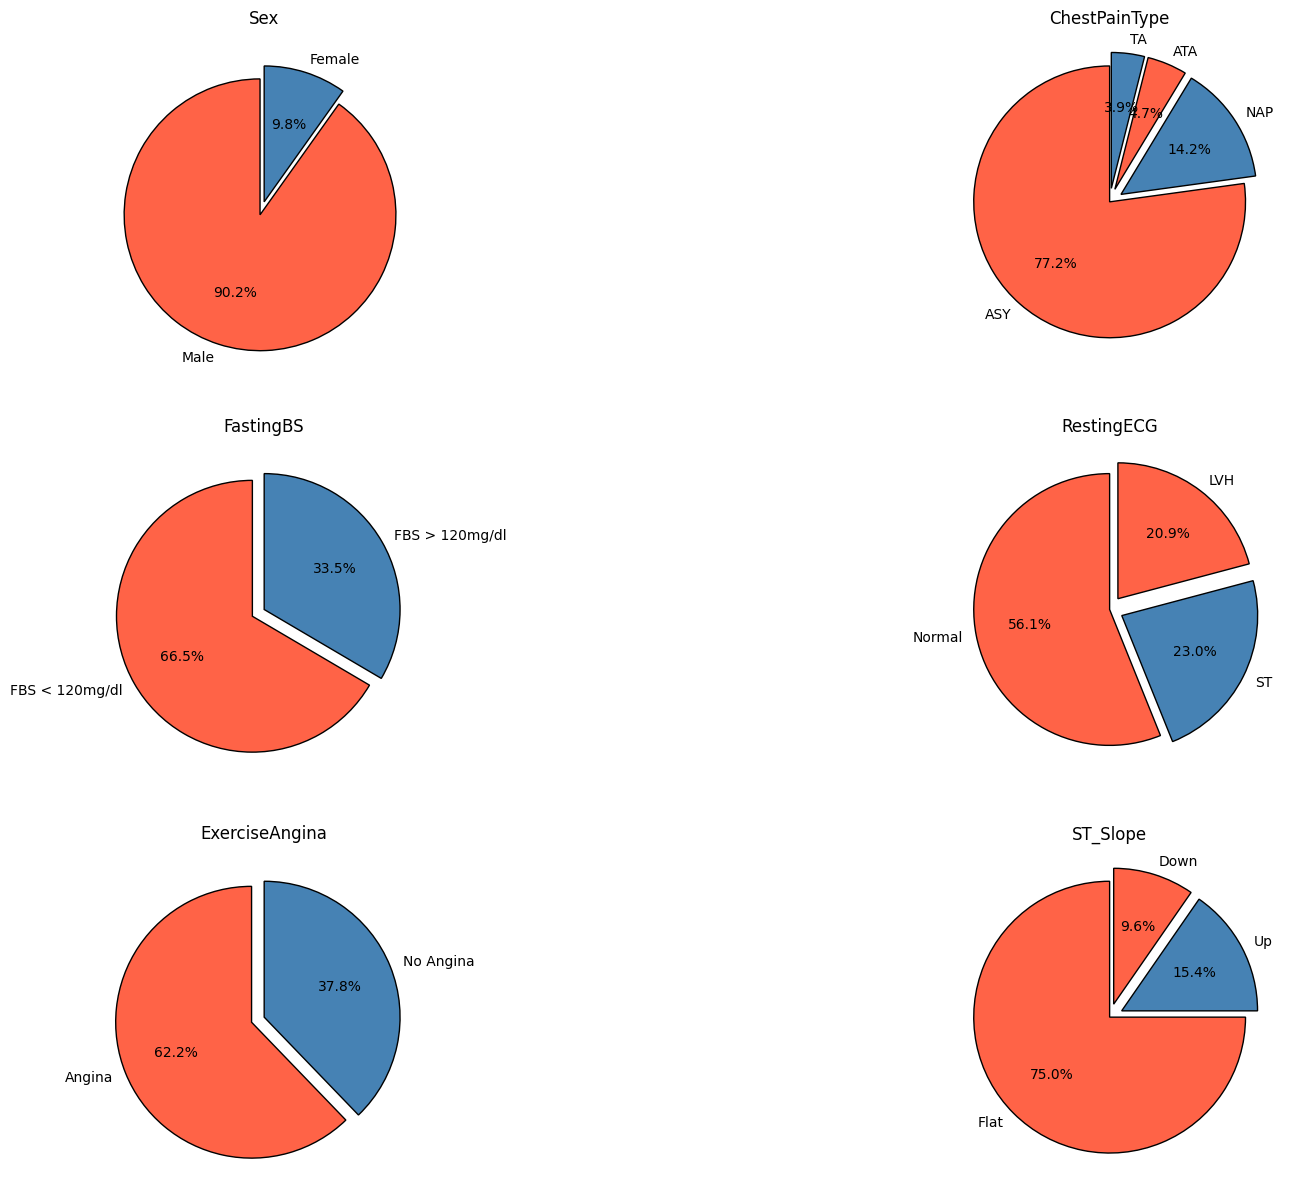

In [ ]:
ax,fig =plt.subplots(nrows=3,ncols=2,figsize=(20,15))
plt.subplot(3,2,1)
plt.pie(sex,labels=['Male','Female'],autopct='%1.1f%%',startangle=90,explode=(0.1,0),colors=pie_colors,wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels=['ASY','NAP','ATA','TA'],autopct='%1.1f%%',startangle=90,explode=(0,0.1,0.1,0.1),colors=pie_colors,wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels=['FBS < 120mg/dl', 'FBS > 120mg/dl '],autopct='%1.1f%%',startangle=90,explode=(0.1,0),colors=pie_colors,wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels=['Normal','ST','LVH'],autopct='%1.1f%%',startangle=90,explode=(0,0.1,0.1),colors=pie_colors,wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(exang,labels=['Angina','No Angina'],autopct='%1.1f%%',startangle=90,explode=(0.1,0),colors=pie_colors,wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels=['Flat','Up','Down'],autopct='%1.1f%%',startangle=90,explode=(0,0.1,0.1),colors=pie_colors,wedgeprops={'edgecolor':'black','linewidth':1,'antialiased':True})
plt.title('ST_Slope');

# Heart disease patients mein se 90% male hain:
Yeh ek shocking statistic hai jo yeh batata hai ki male patients mein **heart disease** kaafi zyada common hai.

# Chest pain type (ASY) ka bada role:
Heart disease cases mein **77% patients ASY (Asymptomatic)** chest pain type ke hain. Yeh ek strong indicator hai heart disease ka.

# Fasting Blood Sugar (<120 mg/dl):
Fasting blood sugar ka level agar **120 mg/dl se kam hai**, to heart disease ke chances zyada hain.

# RestingECG analysis:
**Normal** RestingECG readings mein heart disease hone ke **56% chances **hain, jo **LVH aur ST readings** se zyada hain.

# Exercise-Induced Angina:
Jahan **Exercise-Induced Angina (Yes)** detect hoti hai, wahaan heart disease ke chances bhi barh jaate hain.

# ST_Slope ka flat reading:
**Flat ST_Slope **readings mein **75% heart disease cases** hain, jo yeh dikhata hai ki yeh ek strong marker ho sakti hai underlying heart issues ke liye.








# Numerical Features vs Target Variable (HeartDisease) :

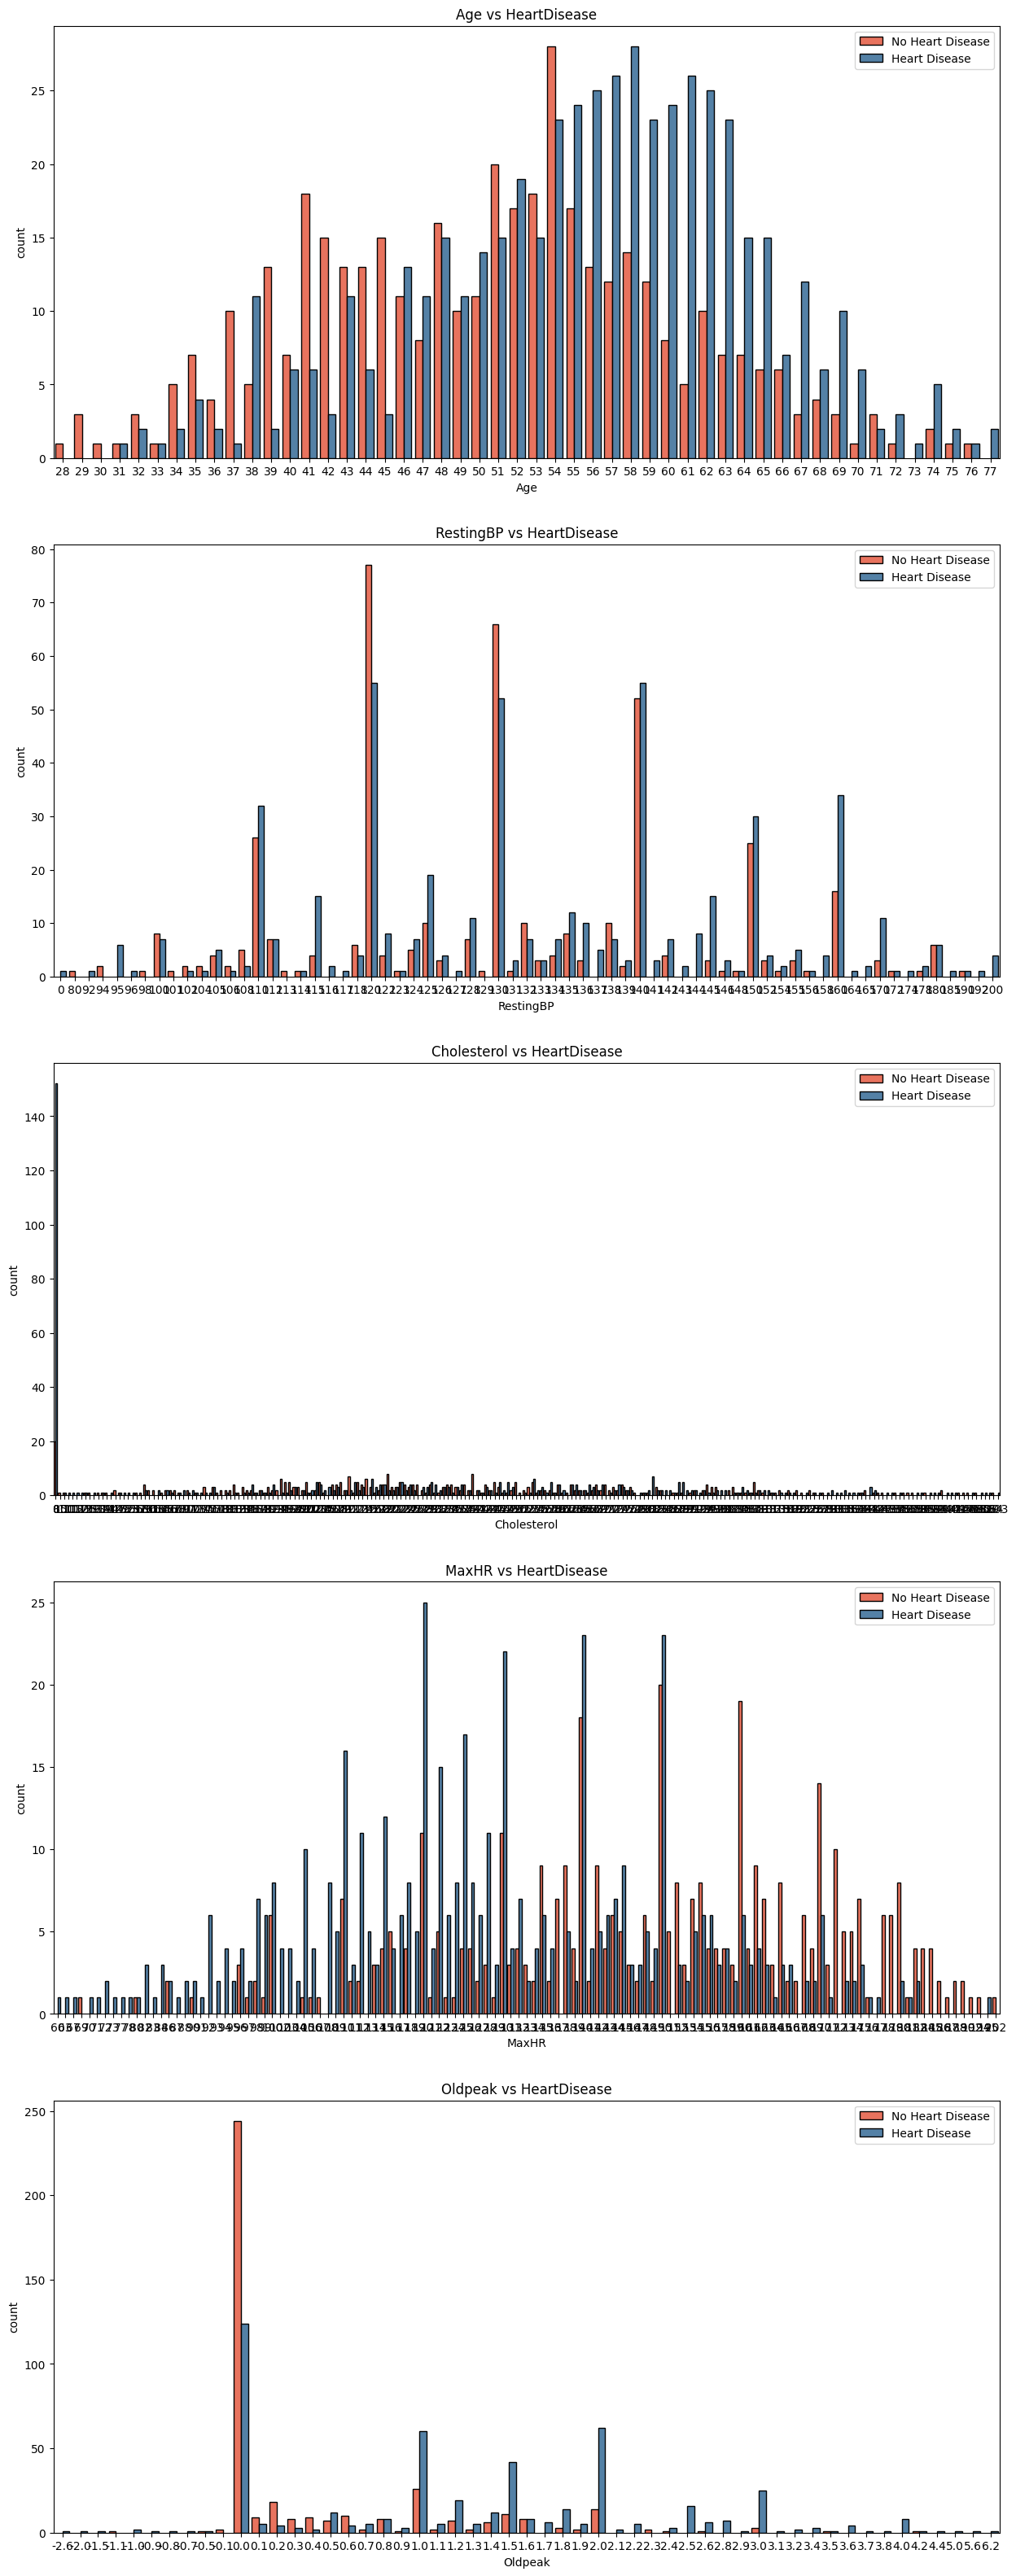

In [ ]:
fig ,ax =plt.subplots(nrows=5,ncols=1,figsize=(15,40))
for i in range(len(numerical_feartures)):
  plt.subplot(5,1,i+1)
  sns.countplot(x=numerical_feartures[i],hue='HeartDisease',data=data,palette=bar_colors,edgecolor='black')
  title=numerical_feartures[i]+' vs HeartDisease'
  plt.legend(['No Heart Disease','Heart Disease'])
  plt.title(title)
plt.show()

# Numerical features ko categorical mein convert karne ki zarurat hai:
Bohot saare unique data points hone ki wajah se in features ko directly samajhna mushkil hai. Is wajah se, numerical features (except age) ko **categorical features** mein convert kiya jayega, jo zyada understandable visualization aur insights generate karne mein madad karega.

# Scaling ka approach:

Individual feature values ko scale karne ke liye **5 ya 10 ka constant** use karte hain.
Har data point ko 5 ya 10 se divide karke uska **quotient** assign karte hain as a representative constant.
**Scaling constants (5 & 10)** ka selection data ko dekh kar aur intuition ke basis par decide kiya gaya hai.

Is tarah se, varied data points ek consistent range mein aa jate hain, jo analysis aur visualization ke liye kaafi helpful hota hai.








In [ ]:
data['RestingBP_Group'] = [ int(i / 5) for i in data['RestingBP']]
data['Cholesterol_Group'] = [ int(i / 10) for i in data['Cholesterol']]
data['MaxHR_Group'] = [ int(i / 5) for i in data['MaxHR']]
data['Oldpeak_Group'] = [ int( (i*10) / 5) for i in data['Oldpeak']]

In [ ]:
data['RestingBP_Group']

0      28
1      32
2      26
3      27
4      30
       ..
913    22
914    28
915    26
916    26
917    27
Name: RestingBP_Group, Length: 918, dtype: int64

In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'RestingBP_Group', 'Cholesterol_Group', 'MaxHR_Group',
       'Oldpeak_Group'],
      dtype='object')

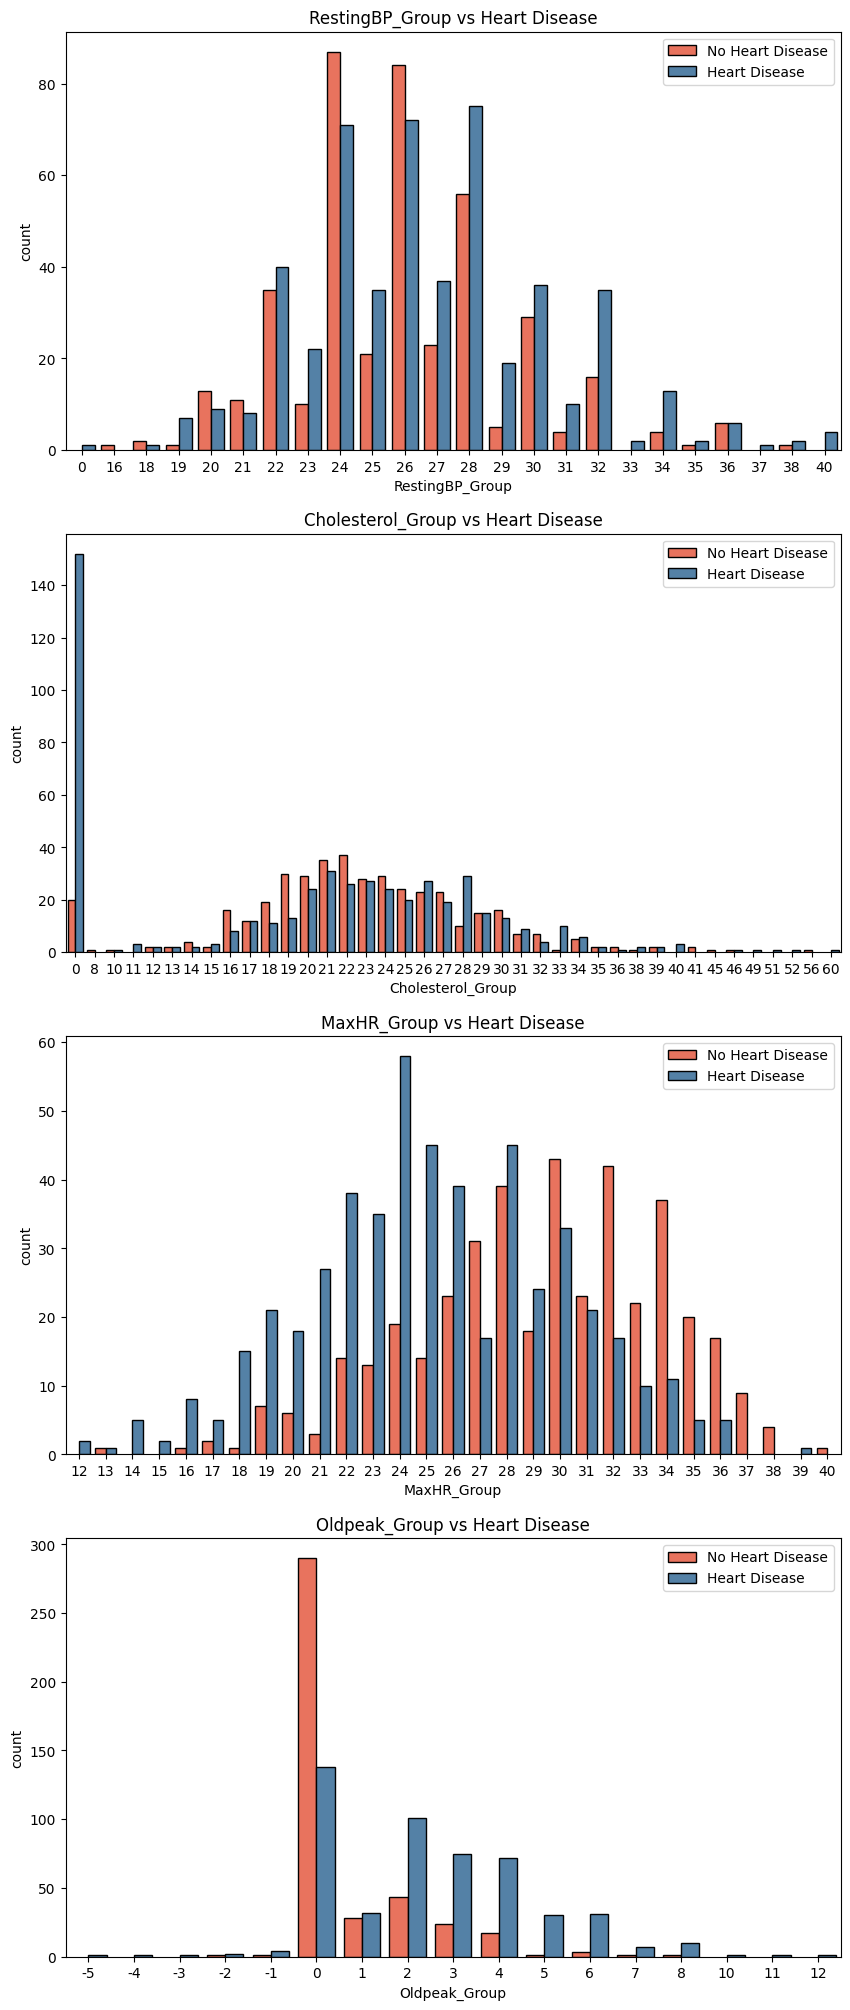

In [ ]:
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (10,25))
group_numerical_features = [i + '_Group' for i in numerical_feartures[1:]]
for i in range(len(group_numerical_features)):
    plt.subplot(4,1,i+1)
    sns.countplot(x=group_numerical_features[i],data = data,hue = "HeartDisease",palette = bar_colors, edgecolor = 'black')
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.title(title);

# RestingBP readings aur heart diseases:
95 (19x5) se le kar 170 (34x5) ke readings mein heart disease detect hone ke chances sabse zyada hain.

# Cholesterol levels aur susceptibility:
160 (16x10) se le kar 340 (34x10) ke cholesterol levels mein heart disease hone ki probability kaafi high hai.

# MaxHR aur heart disease detection:
MaxHR ke readings puri dataset mein heart disease cases ke sath linked hain, lekin 70 (14x5) se le kar 180 (36x5) tak ke values mein sabse zyada cases detect hue hain.

# Oldpeak values aur heart disease:
Oldpeak ke readings bhi heart diseases ke sath har range mein linked hain, lekin 0 (0x5/10) se le kar 4 (8x5/10) ke slope values mein heart disease diagnosed hone ke chances zyada hain


# Numerical aur Categorical Features ka Comparison Target Variable (HeartDisease) ke sath:

#Sex vs Numerical Features :

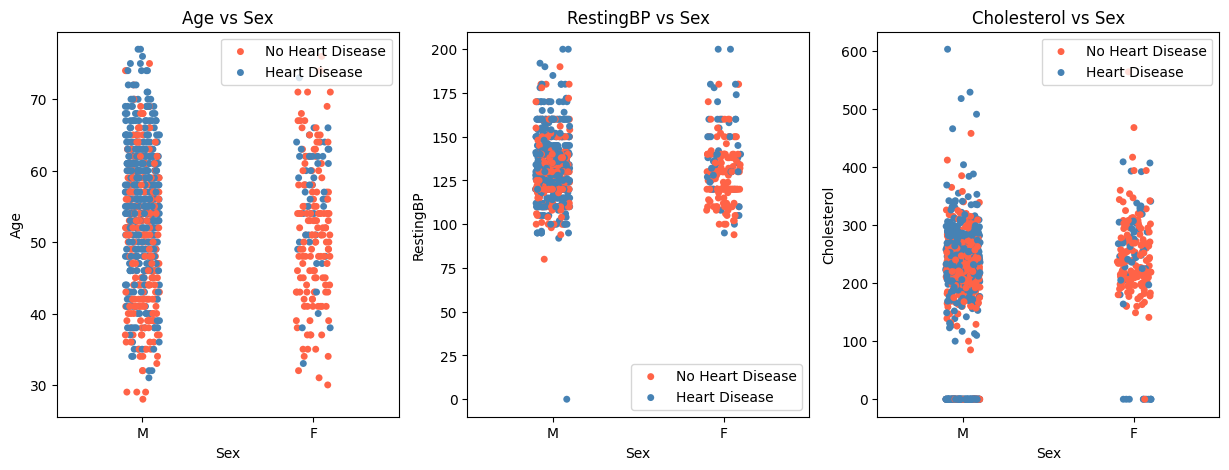

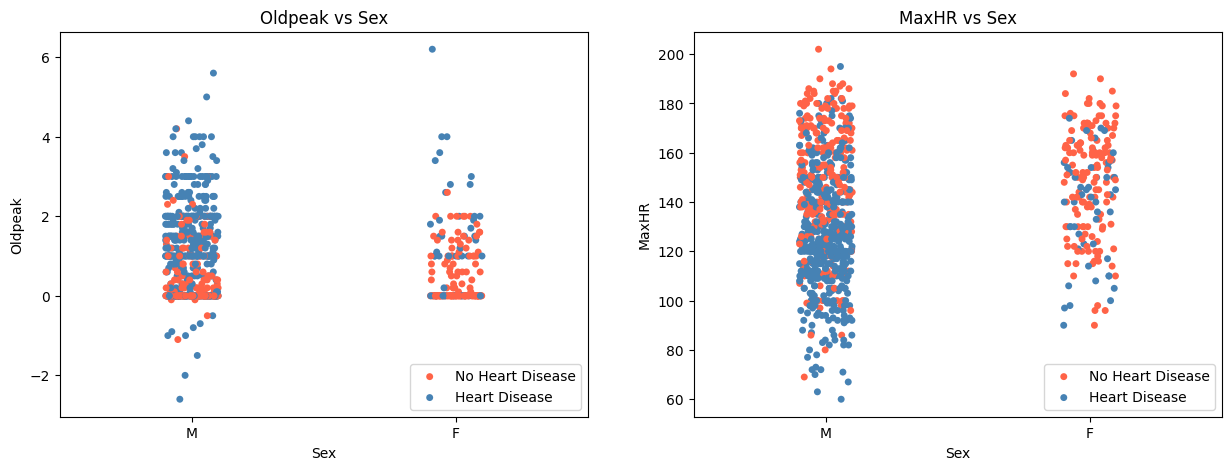

In [ ]:
plt.subplots(nrows=1,ncols=3,figsize=(15,5))
for i in range(3):
  plt.subplot(1,3,i+1)
  sns.stripplot(x='Sex',y=numerical_feartures[i],data=data,hue='HeartDisease',palette=bar_colors);
  plt.legend(['No Heart Disease','Heart Disease'])
  title=numerical_feartures[i]+' vs Sex'
  plt.title(title);

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
for i in [-1,-2]:
  plt.subplot(1,2,-i)
  sns.stripplot(x='Sex',y=numerical_feartures[i],data=data,hue='HeartDisease',palette=bar_colors);
  plt.legend(['No Heart Disease','Heart Disease'])
  title=numerical_feartures[i]+' vs Sex'
  plt.title(title);


# Male Population aur Heart Disease Patterns:

Male population mein heart diseases almost har **numerical feature value** par detect hoti hain.

**Age 50** ke upar, positive **Oldpeak **values aur **MaxHR (below 140**) ke readings mein **heart diseases** kaafi zyada concentrated hain. Yeh points male population mein **dense** heart disease cases ko indicate karte hain.
# Female Population aur Heart Disease Analysis:

Female population mein data points kam hain, isliye **specific ranges** ya values jo heart disease cases ko highlight kar sakein, unko identify karna mushkil hai.

Chhoti sample size ke wajah se, females ke data mein clear patterns detect karna challenging ho jata hai.

Yeh analysis suggests karta hai ki male population mein specific features heart diseases ke liye zyada indicative hain, jabki female population mein insufficient data ke wajah se patterns draw karna mushkil hai.

# ChestPainType vs Numerical Features :

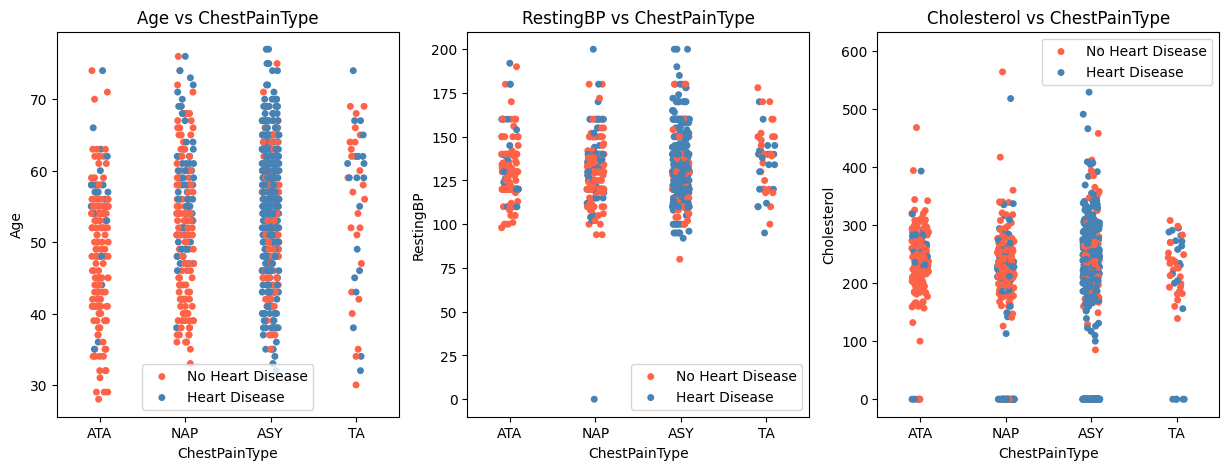

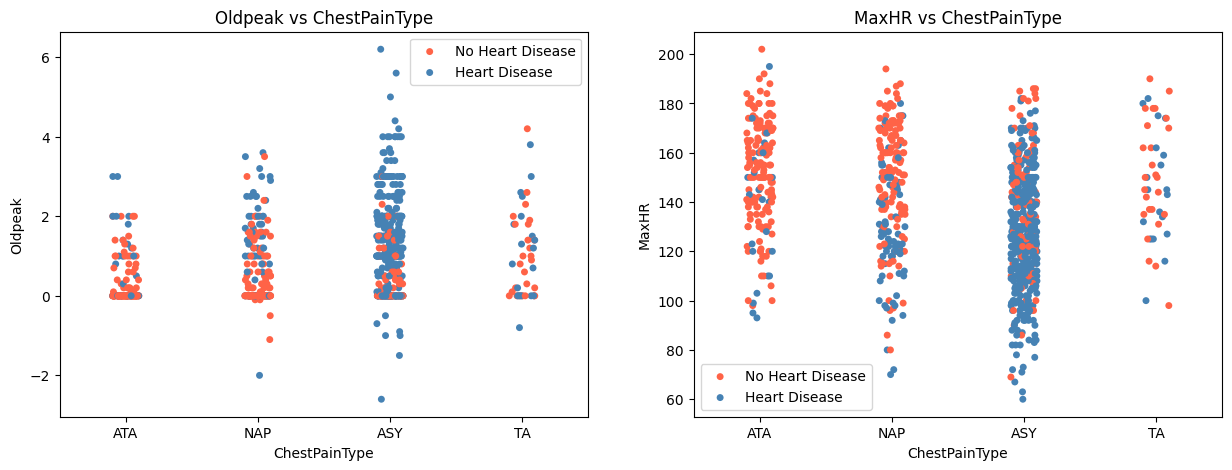

In [ ]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ChestPainType',y = numerical_feartures[i],data = data,hue = 'HeartDisease',palette = bar_colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_feartures[i] + ' vs ChestPainType'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ChestPainType',y = numerical_feartures[i],data = data,hue = 'HeartDisease',palette = bar_colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_feartures[i] + ' vs ChestPainType'
    plt.title(title);

# ASY Type Chest Pain aur Heart Disease Patterns:

**ASY (Asymptomatic)** type of chest pain sabse **zyada dominate** karta hai baaki chest pain types ko, sabhi **numerical features mein**.

Ye type of chest pain har feature (jaise **RestingBP**, **Cholesterol**, **MaxHR**, **Oldpeak**) mein **significantly higher probability** ke saath heart diseases ke cases ko display karta hai.

Iska matlab hai ki ASY chest pain wale patients mein heart disease hone ke chances bohot zyada hain, aur yeh baaki chest pain types ke comparison mein zyada noticeable hai across numerical features.

# FastingBS vs Numerical features :

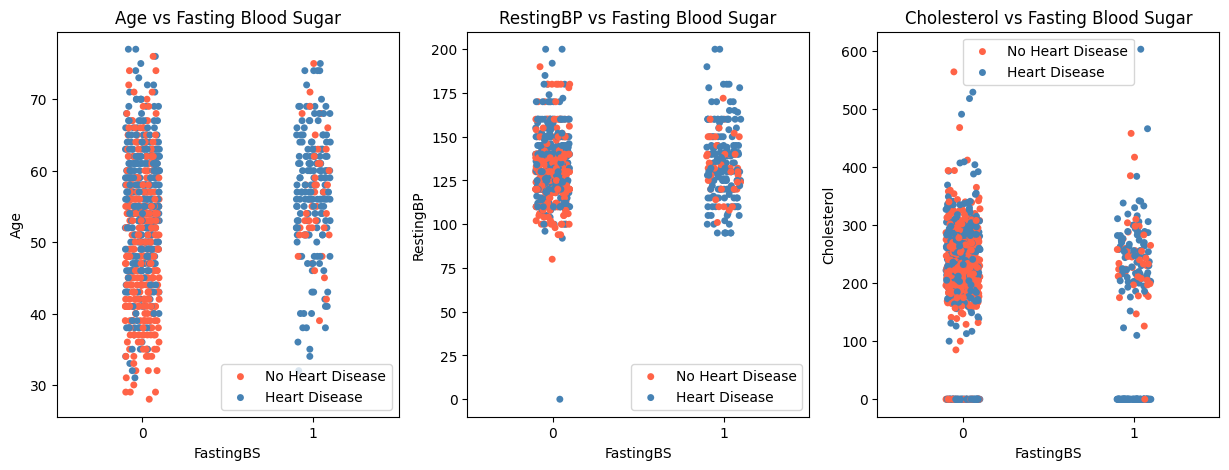

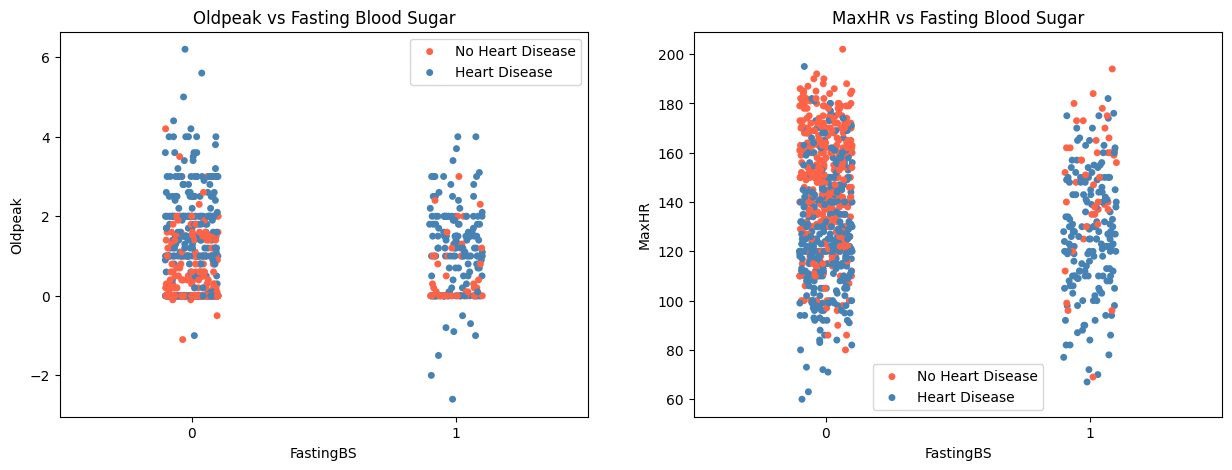

In [ ]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'FastingBS',y = numerical_feartures[i],data = data,hue = 'HeartDisease',palette = bar_colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_feartures[i] + ' vs Fasting Blood Sugar'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'FastingBS',y = numerical_feartures[i],data = data,hue = 'HeartDisease',palette = bar_colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_feartures[i] + ' vs Fasting Blood Sugar'
    plt.title(title);

# Age above 50 aur Heart Diseases:

Age 50 ke upar, heart diseases har data point mein milti hain, chahe patient Fasting Blood Sugar se diagnosed ho ya nahi.

Yeh suggests karta hai ki age ke upar heart diseases ka risk kaafi high hota hai, aur Fasting Blood Sugar ka diagnosis us risk ko zyada affect nahi karta.

# Fasting Blood Sugar ke saath Resting BP:

Patients jinke Fasting Blood Sugar positive hain aur Resting BP 100 ke upar hai, unmein heart diseases ke cases zyada hain as compared to those without Fasting Blood Sugar.

Yeh indication deta hai ki high Resting BP combined with Fasting Blood Sugar positive patients mein heart disease ka risk barhta hai.

# Cholesterol aur Fasting Blood Sugar ka combination:

Cholesterol levels ka Fasting Blood Sugar ke saath koi significant effect nahi dikh raha hai jab heart diseases ko samajhne ki koshish ki jati hai.
Iska matlab hai ki Cholesterol aur Fasting Blood Sugar ka direct relationship heart disease ke cases ke saath clear nahi hai.

# MaxHR aur Fasting Blood Sugar ka relationship:

Patients jo Fasting Blood Sugar se negative hain, lekin jin ka MaxHR 130 ke neeche hai, unmein heart diseases hone ke chances zyada hain.

Yeh point towards karta hai ki low MaxHR combined with negative Fasting Blood Sugar heart disease ke liye ek strong indicator ho sakta hai.







# RestingECG vs Numerical Features :

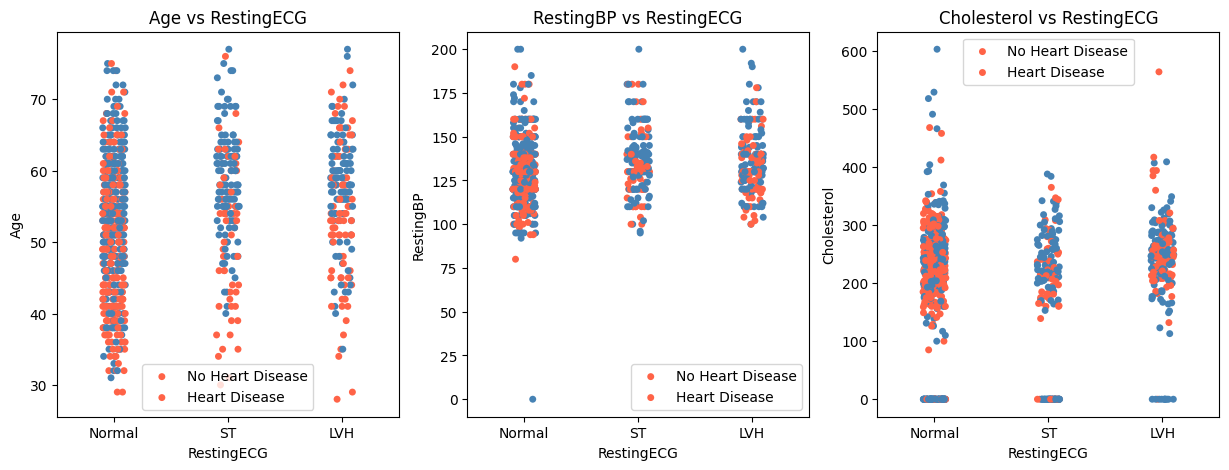

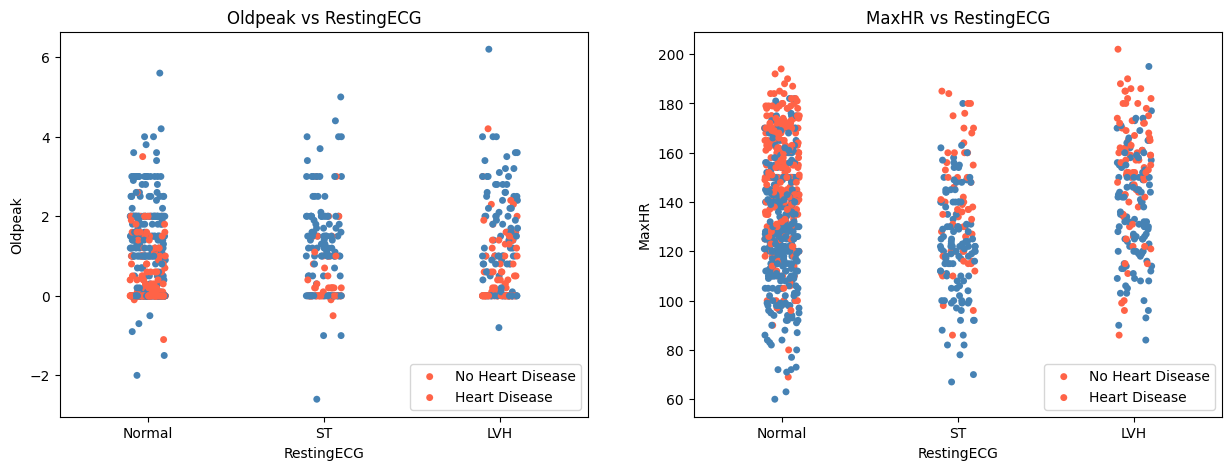

In [ ]:
ig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'RestingECG',y = numerical_feartures[i],data = data,hue = 'HeartDisease',palette = bar_colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_feartures[i] + ' vs RestingECG'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'RestingECG',y = numerical_feartures[i],data = data,hue = 'HeartDisease',palette = pie_colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_feartures[i] + ' vs RestingECG'
    plt.title(title);

# RestingECG Values aur Heart Diseases:

RestingECG ke Normal, ST, aur LVH values ke saath heart diseases 30, 40, aur 40 ke age ke baad detect hoti hain, respectively.

Age 50 ke upar ke patients mein, heart disease hone ke chances zyada hain, chahe RestingECG values kuch bhi ho. Yeh suggest karta hai ki age heart disease ke risk ko kaafi influence karta hai.

# RestingBP aur RestingECG ke Values:

Heart diseases RestingBP aur RestingECG ke kisi bhi values mein consistently dikhayi deti hain, jo indicate karta hai ki yeh features heart disease ke pattern ko accurately represent karte hain across various ranges.

# Cholesterol aur RestingECG ka Combination:

Cholesterol values (200 - 300) ke saath ST value of RestingECG ka combination heart disease cases ka ek patch show karta hai. Yeh indicate karta hai ki Cholesterol aur ST RestingECG levels ka combination heart disease ko predict karne mein significant role play karte hain.

# MaxHR aur RestingECG ka Relationship:

MaxHR values ke liye, heart diseases dense dikhayi deti hain jab MaxHR 140 ke neeche ho aur Normal RestingECG ho.

ST aur LVH values ke saath, MaxHR ke kisi bhi range mein heart diseases consistently detect hoti hain, yeh indicate karta hai ki RestingECG ke ST aur LVH readings MaxHR values ke saath correlated hain.

# ExerciseAngina vs Numerical Features :

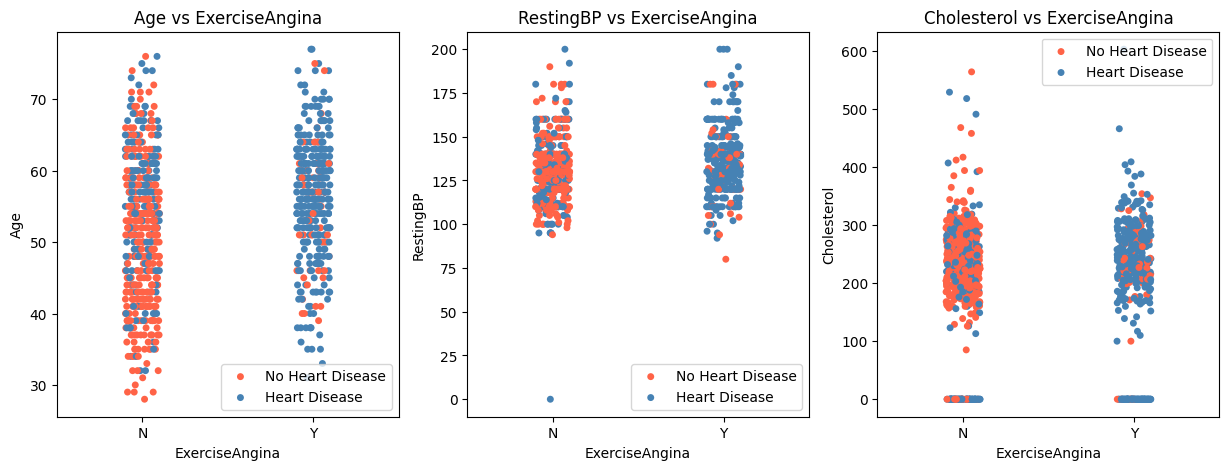

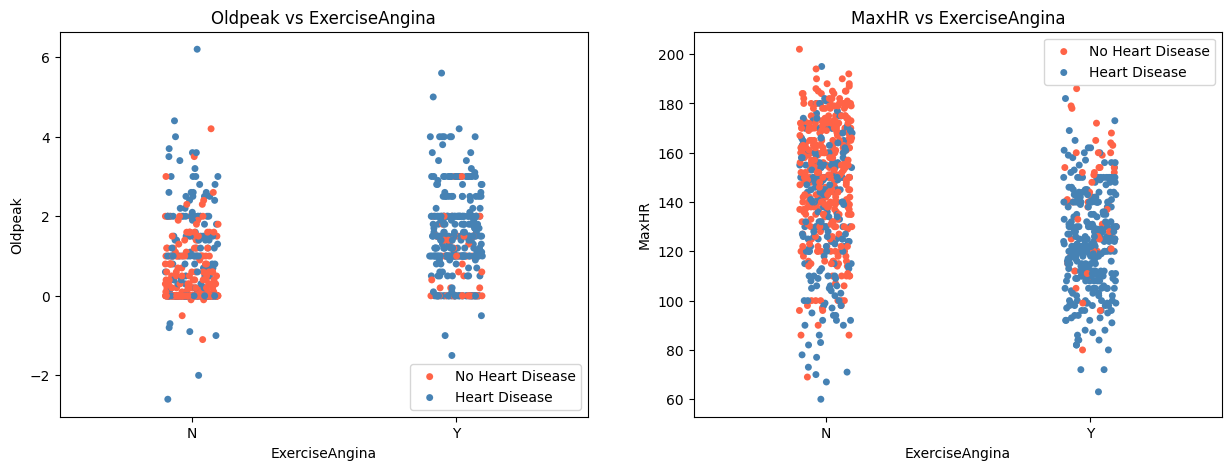

In [ ]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_feartures[i],data = data,hue = 'HeartDisease',palette = pie_colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_feartures[i] + ' vs ExerciseAngina'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ExerciseAngina',y = numerical_feartures[i],data = data,hue = 'HeartDisease',palette = pie_colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_feartures[i] + ' vs ExerciseAngina'
    plt.title(title);

# Exercise Induced Angina aur Heart Disease ka Relationship:

Exercise Induced Angina aur heart disease ke beech ek crystal clear positive correlation dekha gaya hai.

Har numerical feature mein yeh correlation consistently dikhayi deti hai, jo suggest karta hai ki exercise induced angina hone wale patients mein heart disease ka risk kaafi zyada hota hai.

Iska matlab hai ki Exercise Induced Angina ko strong indicator ke roop mein treat kiya ja sakta hai heart disease ke diagnosis ke liye.








# ST_Slope vs Numerical Features :

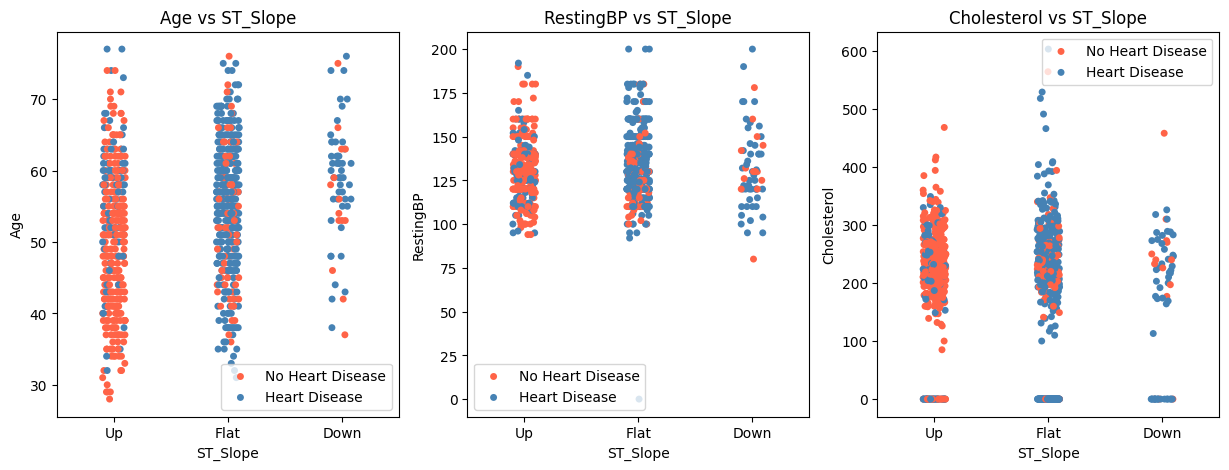

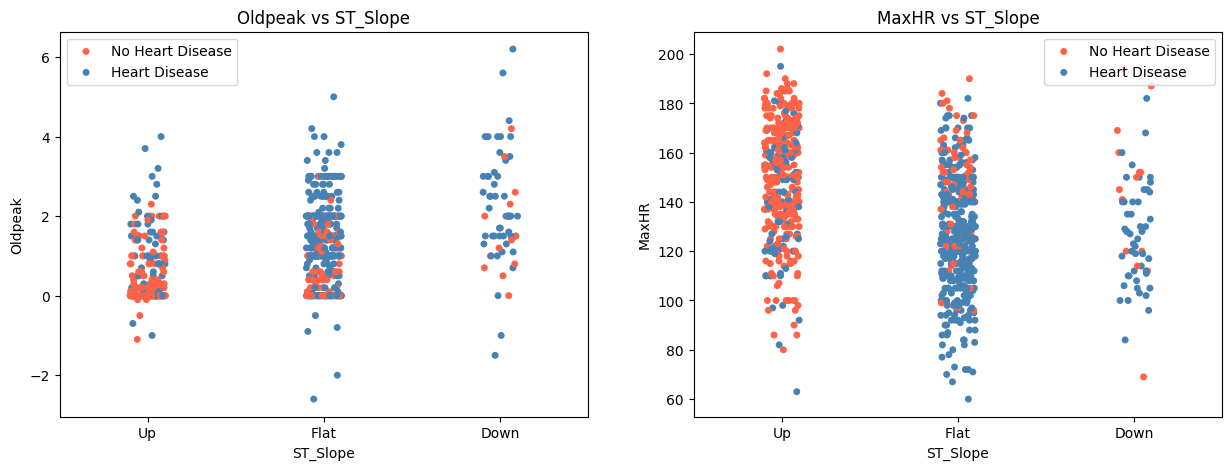

In [ ]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.stripplot(x = 'ST_Slope',y = numerical_feartures[i],data = data,hue = 'HeartDisease',palette = bar_colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_feartures[i] + ' vs ST_Slope'
    plt.title(title);

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
for i in [-1,-2]:
    plt.subplot(1,2,-i)
    sns.stripplot(x = 'ST_Slope',y = numerical_feartures[i],data = data,hue = 'HeartDisease',palette = bar_colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_feartures[i] + ' vs ST_Slope'
    plt.title(title);

# ST_Slope Value aur Heart Disease ka Positive Correlation:

ST_Slope value aur heart disease cases ke beech ek aur crystal clear positive correlation dekhi gayi hai.

Flat ST_Slope value, Down aur Up (in order) heart disease ke cases ko high, middle aur low probability ke saath represent karte hain.

Flat ST_Slope value mein heart disease hone ke chances sabse zyada hote hain, Down thode kam hain, aur Up mein heart disease hone ke chances sabse kam hote hain.

Yeh indicates karta hai ki ST_Slope value ek strong predictor hai heart disease ke risk ko assess karne mein.

# Numerical features vs Numerical features w.r.t Target variable(HeartDisease) :

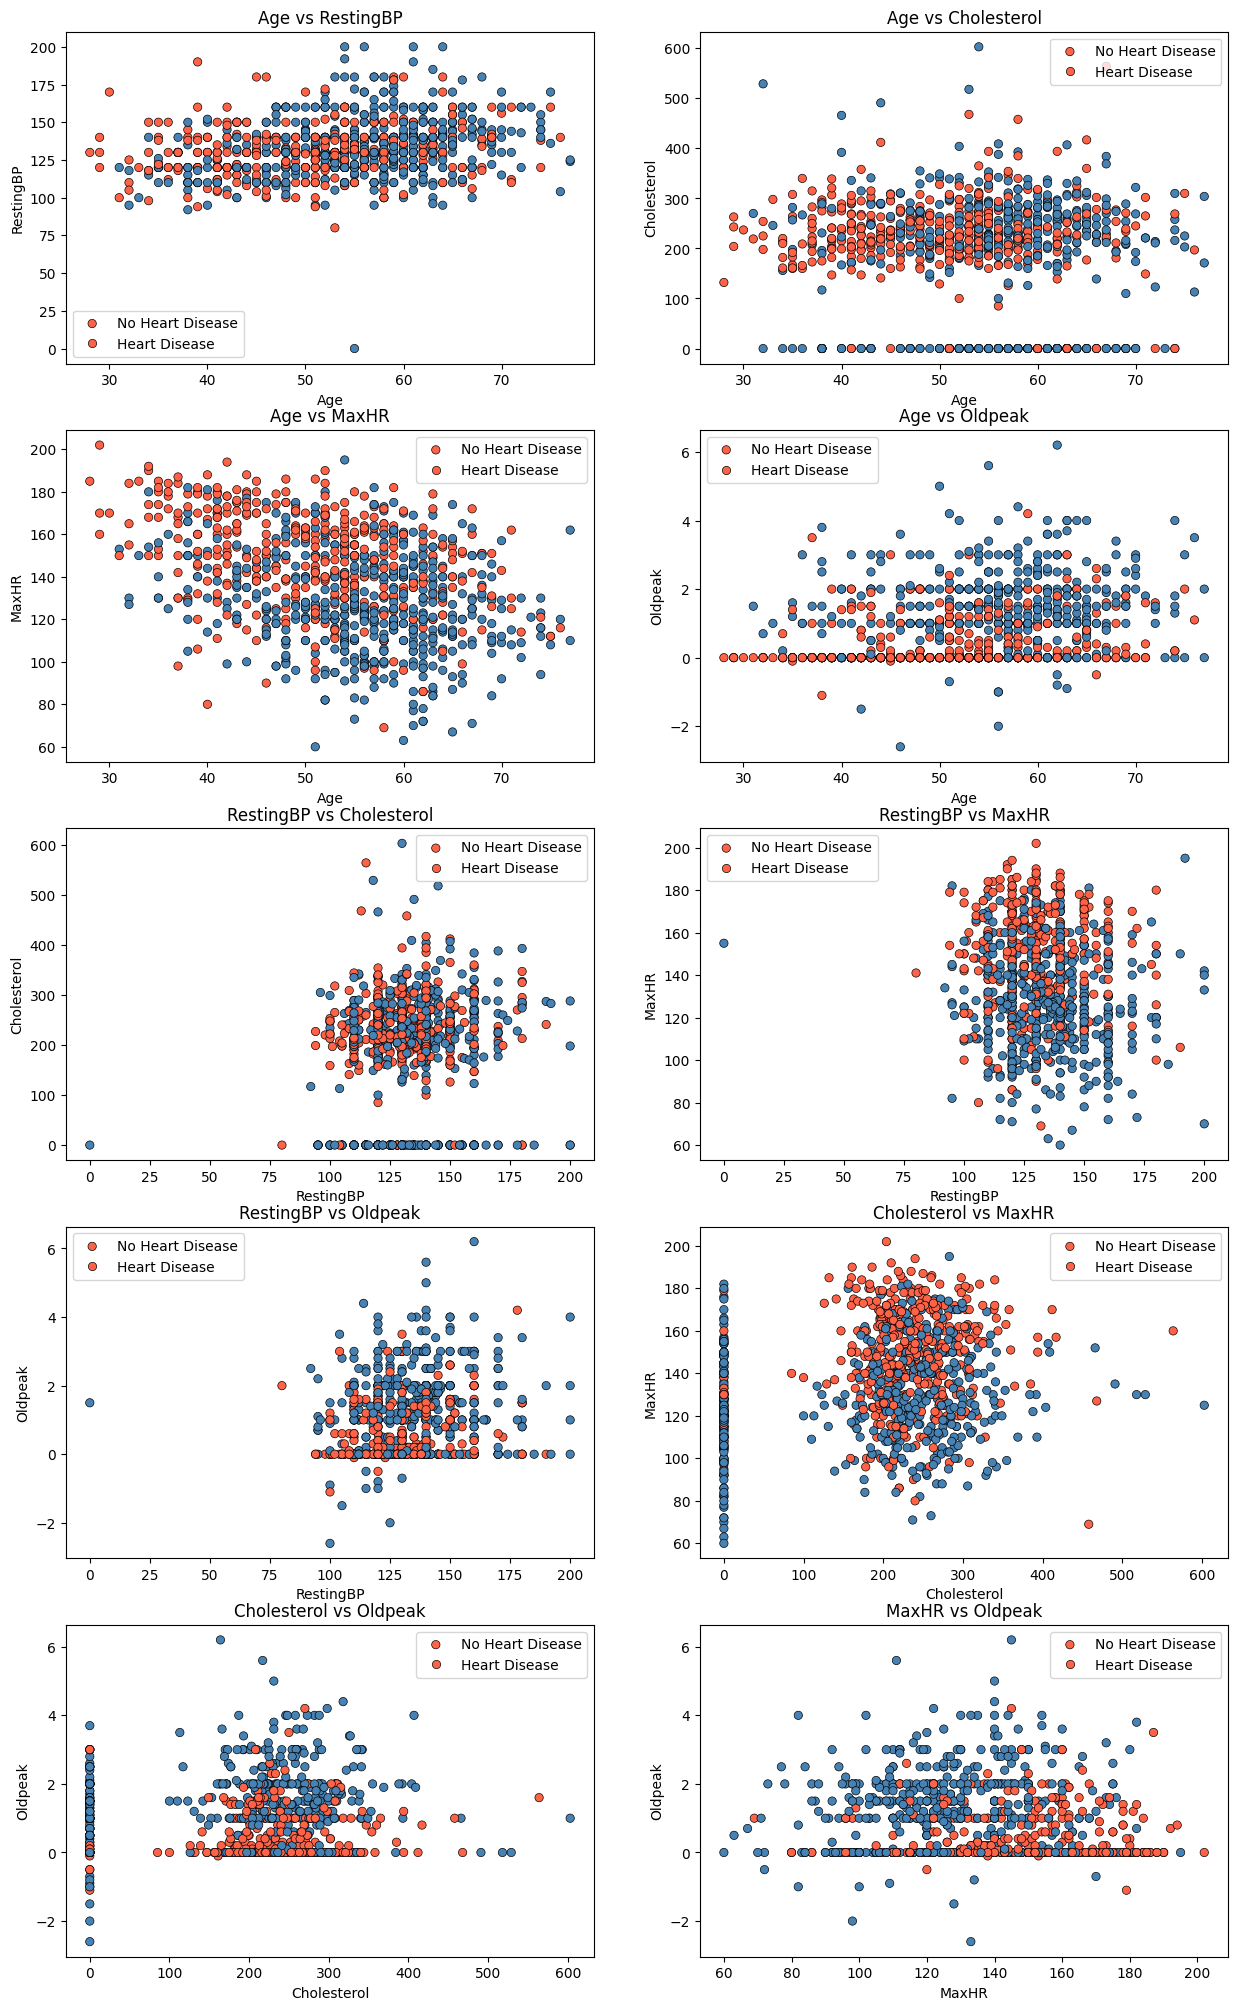

In [ ]:
a = 0
fig,ax = plt.subplots(nrows = 5,ncols = 2,figsize = (15,25))
for i in range(len(numerical_feartures)):
    for j in range(len(numerical_feartures)):
        if i != j and j > i:
            a += 1
            plt.subplot(5,2,a)
            sns.scatterplot(x = numerical_feartures[i],y = numerical_feartures[j],data = data,hue = 'HeartDisease',palette = bar_colors, edgecolor = 'black');
            plt.legend(['No Heart Disease', 'Heart Disease'])
            title = numerical_feartures[i] + ' vs ' + numerical_feartures[j]
            plt.title(title)

# Age 50+ and Heart Disease Indicators:

Age 50+ ke patients mein, RestingBP (100 - 175), Cholesterol (200 - 300), MaxHR (below 160), aur positive Oldpeak values ke saath high heart disease cases dikhayi dete hain.

Yeh indicate karta hai ki age ke saath, yeh features heart disease ke cases ko significantly predict karte hain.

# RestingBP aur Heart Disease Cases:

RestingBP (100 - 175) ke range mein, har feature ke liye bahut zyada heart disease patients highlight hote hain, jo suggest karta hai ki RestingBP kaafi critical factor hai heart disease prediction ke liye.

# Cholesterol aur Heart Disease:

Cholesterol levels (200 - 300) ke range mein, heart disease cases dominate karte hain, jo show karta hai ki Cholesterol ek strong indicator hai heart disease ke risk ke liye.

# MaxHR aur Heart Disease:

MaxHR (below 140) ke values ke saath, heart diseases hone ke chances high hote hain, jo suggest karta hai ki low MaxHR values kaafi linked hain heart disease ke cases se.







# Summary of EDA

# Heart Disease Cases ke Liye Features ka Order / Values:

# Categorical Features (Order):

**Sex:** Male > Female

**ChestPainType:** ASY > NAP > ATA > TA

**FastingBS:** FBS < 120 mg/dl > FBS > 120 mg/dl

**RestingECG:** Normal > ST > LVH

**ExerciseAngina:** Angina > No Angina

**ST_Slope:** Flat > Up > Down


# Numerical Features (Range):

**Age:**50+

**RestingBP:** 95 - 170

**Cholesterol:** 160 - 340

**MaxHR:**70 - 180

**Oldpeak:**0 - 4

**Agla Step:**
Ab hum feature selection ke next step pe move karte hain, jahan hum modeling ke liye suitable features choose karenge!








# Feature Engineering

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms=MinMaxScaler()
ss=StandardScaler()

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0 -1.43    1              1       0.41         0.83          0           1   
1 -0.48    0              2       1.49        -0.17          0           1   
2 -1.75    1              1      -0.13         0.77          0           2   
3 -0.58    0              0       0.30         0.14          0           1   
4  0.05    1              2       0.95        -0.03          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0   1.38               0     0.30         2             0  
1   0.75               0     0.41         1             1  
2  -1.53               0     0.30         2             0  
3  -1.13               1     0.47         1             1  
4  -0.58               0     0.30         2             0

Machine learning model ko feature ke values ke units ka pata nahi hota. Woh sirf numbers ko samajhta hai, par un values ka asli matlab nahi samajhta. Isliye data ko scale karna zaroori ho jaata hai.


Jaise Age ko hum years mein measure karte hain, aur FastingBS ko mg/dl mein. Agar hum in values ko directly compare karein, toh unki units alag alag hain, isliye scaling zaroori ho jaata hai.


Humein do options milte hain data ko scale karne ke liye:


**Normalization:** Jab data normal distribution mein nahi hota ya skewed hota hai, tab Normalization karte hain. Oldpeak feature ko humne normalization kiya hai kyunki iska data right skewed tha. Isse values ko [0,1] ke range mein scale kiya jaata hai, jo model ko better samajhne mein madad karta hai.


**Standardization:**Jab data normal distribution mein hota hai aur features ke values bohot zyada ya bohot kam hote hain, tab hum Standardization karte hain. Age, RestingBP, Cholesterol, aur MaxHR features ko standardize kiya gaya hai, kyunki yeh features normal distribution mein hain aur unka scale doosre features se kaafi different hai. Standardization se data ka mean 0 aur standard deviation 1 ho jaata hai, jo models ko accurately train karne mein help karta hai.


Is tarah se scaling karne se humare machine learning model ko proper results milte hain.








<Axes: >

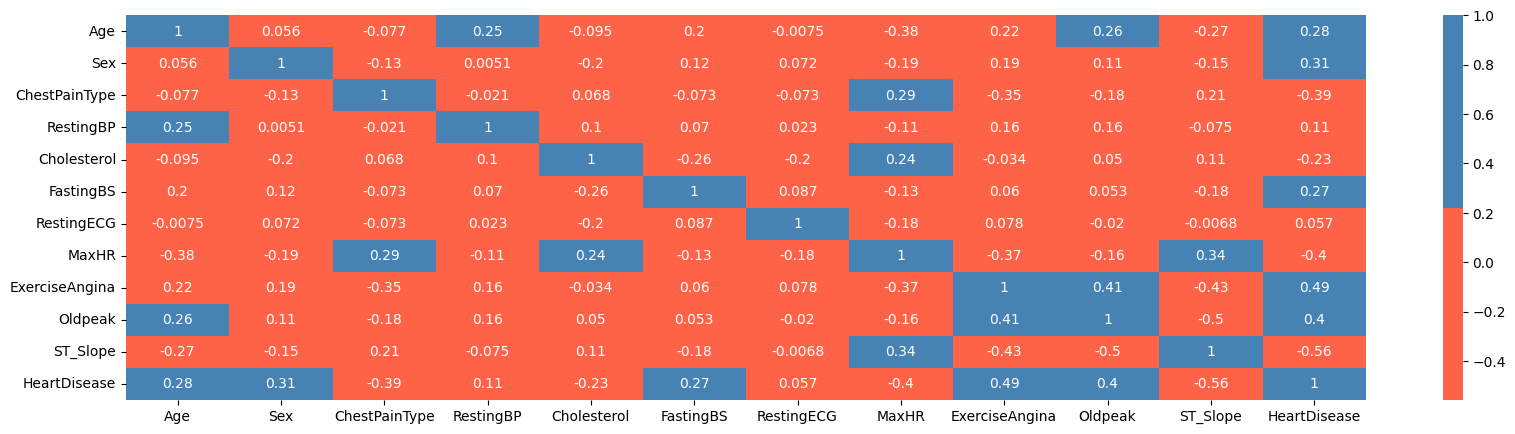

In [ ]:
plt.figure(figsize=(20,5))
sns.heatmap(df1.corr(),annot=True,cmap=bar_colors)

Yeh ek bohot bara matrix hai jisme kai features hain. Hum correlation sirf HeartDisease ke respect mein check karenge, taake hum samajh sakein ki kaunse features HeartDisease ke saath zyada closely related hain. Isse hum important features ko identify kar paenge jo model ke liye useful ho sakte hain.


Hum correlation matrix ko calculate karenge, aur uske baad HeartDisease ke saath correlation dekhte hain. Yahan HeartDisease ko target variable samjha jayega, aur hum dusre features ka relationship HeartDisease ke saath observe karenge.


Agar aap chahte hain, toh is correlation ko visualize bhi kar sakte hain, taake data ko samajhna aur bhi asaan ho jaaye.

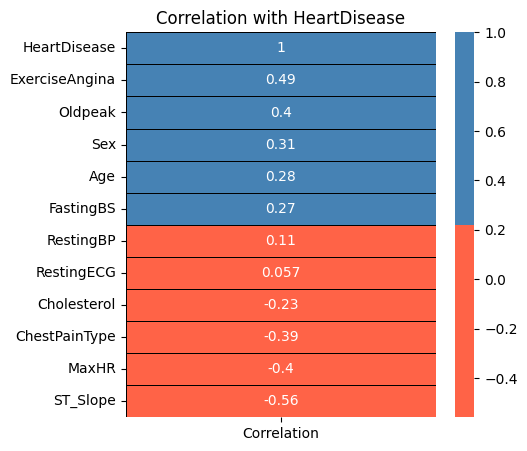

In [ ]:
corr=df1.corrwith(df1['HeartDisease']).sort_values(ascending=False).to_frame()
corr.columns=['Correlation']
plt.subplots(figsize=(5,5))
sns.heatmap(corr,annot=True,cmap=bar_colors,linewidths=0.4,linecolor='black');
plt.title('Correlation with HeartDisease');

estingBP aur RestingECG ke alawa, baaki sab features ka HeartDisease ke saath positive ya negative relationship hai. Matlab, in features ke values badalne se HeartDisease ka risk increase ya decrease ho sakta hai.

**For example:**

Age, Cholesterol, MaxHR, aur Oldpeak jaise features ka HeartDisease ke saath correlation positive ya negative ho sakta hai, jiska matlab hai ki in features ka increase ya decrease HeartDisease ke chances ko affect karta hai.

RestingBP aur RestingECG mein koi clear relationship nahi dikhayi deta, ya phir unka effect HeartDisease ke liye significant nahi lagta.

Isliye, RestingBP aur RestingECG ko model mein zyada importance nahi di ja sakti, jab tak in features ka koi aur pattern na mile.

# Chi Squared Test :

In [ ]:
from sklearn.feature_selection import SelectKBest,chi2

In [ ]:
features=df1.loc[:,categorical_features[:-1]]
df1.loc[:,categorical_features[-1]]